In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
def encontrarMaximos(canal,datosTiempo,mu,std):
    nPeriodo = 0
    tiempos = []
    nPeriodos = []
    contador = 0
    nMaximos = 0
    tiempoEntreMaximos = 0
    maximoEncontrado = False
    for x in canal:
        if (x>mu+std or x<mu-std) and maximoEncontrado == False:
            nMaximos += 1
            maximoEncontrado = True
            tiempoEntreMaximos = 0
            if nMaximos % 2 == 0:
                nPeriodo += 1
                nPeriodos.append(nPeriodo)
                tiempos.append(datosTiempo[contador])
        elif x<=mu+std: 
            tiempoEntreMaximos +=1
            if tiempoEntreMaximos > 5: 
                maximoEncontrado = False
        contador += 1
        nPeriodosRETURN = np.array(nPeriodos)
        tiemposRETURN = np.array(tiempos)
    return nMaximos, nPeriodosRETURN, tiemposRETURN

def lineal(x,m,b):
    return m*x + b

def periodoBatido(canal,datosTiempo,mu,std):
    tiempoEntreMaximos = 0
    contadorDatos = 0
    nPeriodos = 0
    tiemposBatidos = []
    nPeriodosBatidos = []
    batidoEncontrado = False
    for x in canal:
        if x > mu + std:
            tiempoEntreMaximos = 0
            batidoEncontrado = False
        else: tiempoEntreMaximos +=1
        if tiempoEntreMaximos > 170 and batidoEncontrado == False:
            batidoEncontrado = True
            tiempo1 = datosTiempo[contadorDatos]
            tiemposBatidos.append(tiempo1)
            nPeriodos +=1
            nPeriodosBatidos.append(nPeriodos)
        contadorDatos +=1
    nPeriodosBatidosRETURN = np.array(nPeriodosBatidos)
    tiemposBatidosRETURN = np.array(tiemposBatidos)
    return nPeriodosBatidosRETURN , tiemposBatidosRETURN

def regresionLineal(datosX,datosY,magnitudError,ejeX="",ejeY="",titulo1="",titulo2="",ejeYResiduos=""):
    fig, ax = plt.subplots(1,2, figsize=(14,6))

    error = np.ones(len(datosY))*magnitudError

    ax[0].errorbar(datosX, datosY, yerr=error, fmt='k.', ms=10, elinewidth=1, zorder=3)
    ax[0].set_xlabel(ejeX)
    ax[0].set_ylabel(ejeY)
    ax[0].set_title(titulo1)

    popt, pcov = curve_fit(lineal, datosX, datosY, sigma=error, absolute_sigma=True)
    std = np.sqrt(np.diag(pcov))

    domain = np.linspace(0,len(datosX))
    ax[0].plot(domain, lineal(domain,*popt), 'k-', alpha=.5)

    residuos = datosY - lineal(datosX,*popt)
    ax[1].plot(datosX, residuos, 'C3o')
    ax[1].errorbar(datosX, residuos, yerr=error, fmt='k.', ms=10, elinewidth=1, zorder=3)
    ax[1].set_xlabel(ejeX)
    ax[1].set_ylabel(ejeYResiduos)
    ax[1].set_title(titulo2)

    pendiente = popt[0]
    ordenada = popt[1]

    print(f'[R.L] Pendiente: {pendiente} \u00B1 {std[0]}')
    print(f'[R.L] Ordenada al origen: {ordenada} \u00B1 {std[1]}')

    ax[0].grid()
    ax[1].grid()
    plt.show()
    return pendiente , ordenada

In [3]:
EF1data = pd.read_excel("datos/datosPendulosAcopladosEnFase.xlsx", "1")

------ CANAL 1 ------
Promedio: -0.0024782000000000003
Desviacion estandar del metodo: 0.0006005120814771339
Numero de maximos: 93 de 4000 datos

[R.L] Pendiente: 1.8305680542725544 ± 0.001110597401258326
[R.L] Ordenada al origen: -1.0171971014533887 ± 0.029975841704102675


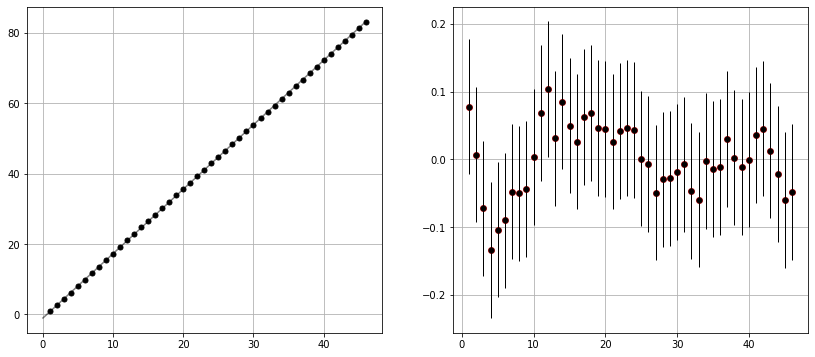

------ CANAL 2 ------
Promedio: 0.0026517999999999997
Desviacion estandar del metodo: 0.0012214568187209893
Numero de maximos: 79 de 4000 datos
[R.L] Pendiente: 2.0460627530387088 ± 0.001422776069039724
[R.L] Ordenada al origen: 0.6793603238866389 ± 0.03265159796095194


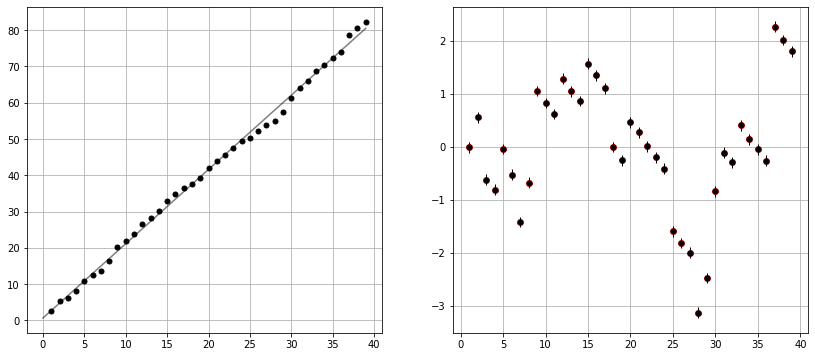

In [4]:
canal1 = EF1data['Canal 1'].values[2000:6000]
datosTiempo1 = EF1data['Tiempo'].values[2000:6000]

datosTiempo1 -= datosTiempo1[0]

mu, std = norm.fit(canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)
#print("Desviacion estandar del promedio:",std/math.sqrt(100))
maximos1, nPeriodos1 , tiempos1 = encontrarMaximos(canal1,datosTiempo1,mu,0.4*std)
print("Numero de maximos:",maximos1,"de",canal1.size,"datos")

print('')

EF1T1 , ordenada = regresionLineal(nPeriodos1,tiempos1,0.1)

print("------ CANAL 2 ------")

canal2 = EF1data['Canal 2'].values[2000:6000]
datosTiempo2 = EF1data['Tiempo'].values[2000:6000]

mu, std = norm.fit(canal2)

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)
#print("Desviacion estandar del promedio:",std/math.sqrt(100))
maximos2, nPeriodos2, tiempos2 = encontrarMaximos(canal2,datosTiempo2,mu,1.8*std)
print("Numero de maximos:",maximos2,"de",canal2.size,"datos")

EF1T2 , ordenada = regresionLineal(nPeriodos2,tiempos2,0.1)

print('')

In [5]:
EF2data = pd.read_excel("datos/datosPendulosAcopladosEnFase.xlsx", "2")

------ CANAL 1 ------
Promedio: -0.002391849999999999
Desviacion estandar del metodo: 0.00026269483721611274
Numero de maximos: 35 de 2000 datos

[R.L] Pendiente: 2.3050735294146123 ± 0.0049507376529206075
[R.L] Ordenada al origen: 86.28710294136249 ± 0.05072996556185991


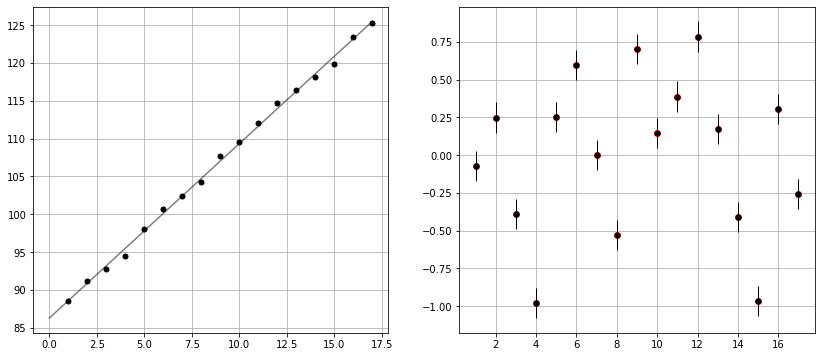

------ CANAL 2 ------
Promedio: -0.00216765
Desviacion estandar del metodo: 0.003497338770765566
Numero de maximos: 61 de 2000 datos
[R.L] Pendiente: 1.2950820911526304 ± 0.0021093572959831187
[R.L] Ordenada al origen: 85.35129425409006 ± 0.037447280821901026


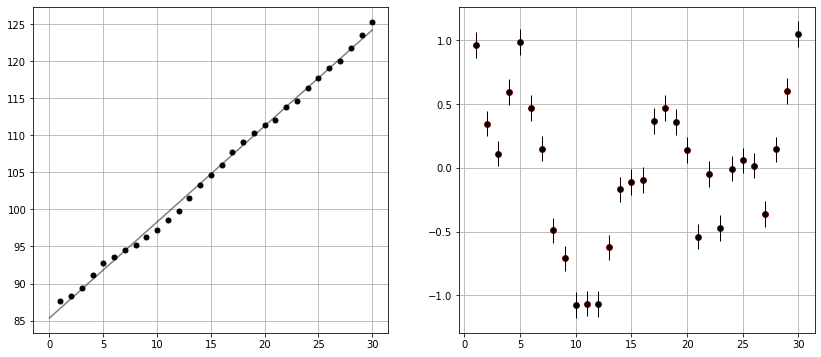

In [6]:
canal1 = EF2data['Canal 1'].values[4000:6000]
datosTiempo1 = EF2data['Tiempo'].values[4000:6000]
mu, std = norm.fit(canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)
#print("Desviacion estandar del promedio:",std/math.sqrt(100))
maximos1, nPeriodos1 , tiempos1 = encontrarMaximos(canal1,datosTiempo1,mu,std)
print("Numero de maximos:",maximos1,"de",canal1.size,"datos")

print('')

EF2T1 , ordenada = regresionLineal(nPeriodos1,tiempos1,0.1)

print("------ CANAL 2 ------")

canal2 = EF2data['Canal 2'].values[4000:6000]
datosTiempo2 = EF2data['Tiempo'].values[4000:6000]

mu, std = norm.fit(canal2)

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)
#print("Desviacion estandar del promedio:",std/math.sqrt(100))
maximos2, nPeriodos2, tiempos2 = encontrarMaximos(canal2,datosTiempo2,mu,1.5*std)
print("Numero de maximos:",maximos2,"de",canal2.size,"datos")

EF2T2 , ordenada = regresionLineal(nPeriodos2,tiempos2,0.1)

print('')

In [7]:
EF3data = pd.read_excel("datos/datosPendulosAcopladosEnFase.xlsx", "3")

------ CANAL 1 ------
Promedio: -0.0024144999999999995
Desviacion estandar del metodo: 0.0006485597505241904
Numero de maximos: 41 de 2000 datos

[R.L] Pendiente: 2.0508187969947738 ± 3.877834686739471e-06
[R.L] Ordenada al origen: 0.7528526315784073 ± 4.645315321340296e-05


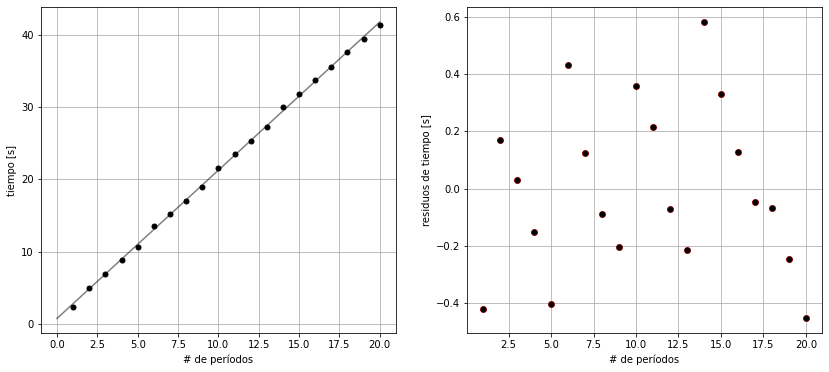

------ CANAL 2 ------
Promedio: -0.0021134500000000002
Desviacion estandar del metodo: 0.0030647518818821204
Numero de maximos: 47 de 2000 datos
[R.L] Pendiente: 1.8519081027686568 ± 0.0031434734832690987
[R.L] Ordenada al origen: -0.5064624505961688 ± 0.0431011381076683


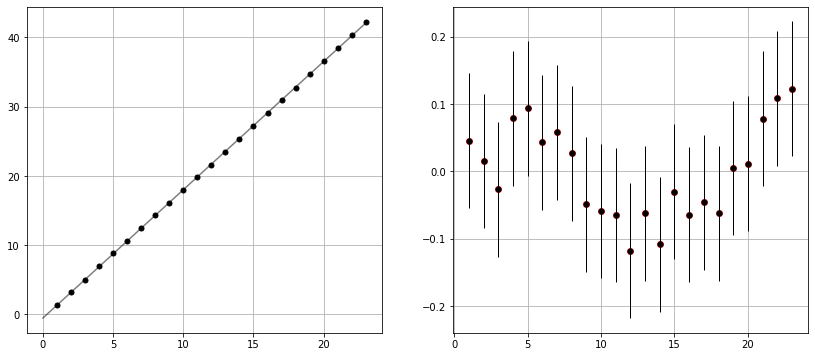

In [42]:
canal1 = EF3data['Canal 1'].values[4000:6000]
datosTiempo1 = EF3data['Tiempo'].values[4000:6000]
datosTiempo1 -= datosTiempo1[0]
mu1, std1 = norm.fit(canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu1)
print("Desviacion estandar del metodo:",std1)
#print("Desviacion estandar del promedio:",std1/math.sqrt(100))
maximos1, nPeriodos1 , tiempos1 = encontrarMaximos(canal1,datosTiempo1,mu1,2.4*std1)
print("Numero de maximos:",maximos1,"de",canal1.size,"datos")

print('')

EF3T1 , ordenada = regresionLineal(nPeriodos1,tiempos1,0.0001,ejeX="# de períodos",ejeY="tiempo [s]",ejeYResiduos="residuos de tiempo [s]")

print("------ CANAL 2 ------")

canal2 = EF3data['Canal 2'].values[4000:6000]
datosTiempo2 = EF3data['Tiempo'].values[4000:6000]
datosTiempo2 -= datosTiempo2[0]

mu, std = norm.fit(canal2)

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)
#print("Desviacion estandar del promedio:",std/math.sqrt(100))
maximos2, nPeriodos2, tiempos2 = encontrarMaximos(canal2,datosTiempo2,mu,1.5*std)
print("Numero de maximos:",maximos2,"de",canal2.size,"datos")

EF3T2 , ordenada = regresionLineal(nPeriodos2,tiempos2,0.1)

print('')

Text(0, 0.5, 'Numero de mediciones')

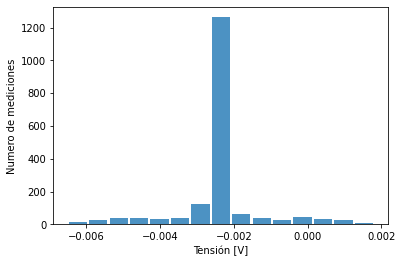

In [80]:
plt.hist(canal1, 15, density=True, rwidth=.9, alpha=.8)
plt.xlabel('Tensión [V]')
plt.ylabel("Numero de mediciones")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Tiempo [s]')

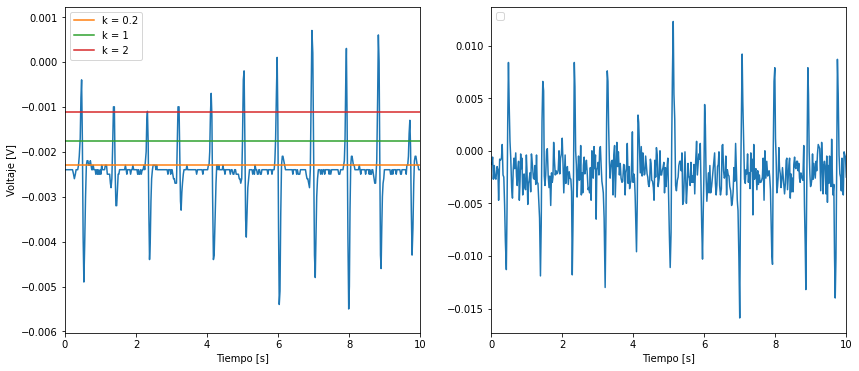

In [59]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(datosTiempo1,canal1)
lineaHorizontal = np.linspace(0,10)
ax[0].set_xlim(0,10)
ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+0.2*std1),label="k = 0.2")
ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+std1),label="k = 1")
ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+2*std1),label="k = 2")
ax[0].legend(loc = "upper left")

ax[1].set_xlim(0,10)
ax[1].plot(datosTiempo2,canal2)
ax[1].legend(loc = "upper left")
ax[0].set_ylabel("Voltaje [V]")
ax[0].set_xlabel("Tiempo [s]")
ax[1].set_xlabel("Tiempo [s]")

In [10]:
ECF1data = pd.read_excel("datos/datosPendulosAcopladosEnContraFase.xlsx", "1")

------ CANAL 1 ------
Promedio: -0.00247365
Desviacion estandar del metodo: 0.000787032831271987
Numero de maximos: 50 de 2000 datos
[R.L] Pendiente: 1.6032261538474775 ± 2.773502023066011e-06
[R.L] Ordenada al origen: -0.16054000000176605 ± 4.123105201465563e-05


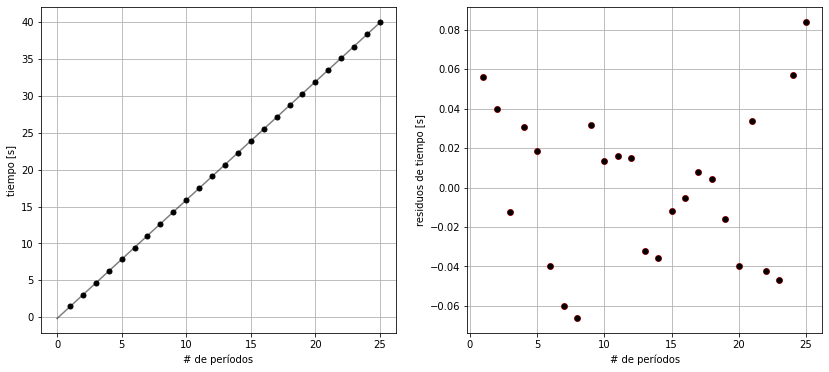

------ CANAL 2 ------
Promedio: 0.0026585999999999997
Desviacion estandar del metodo: 0.001315076438843005
Numero de maximos: 129 de 2000 datos
[R.L] Pendiente: 0.6337970009149481 ± 6.766649856202542e-07
[R.L] Ordenada al origen: -1.7477306547670275 ± 2.5295868914118887e-05


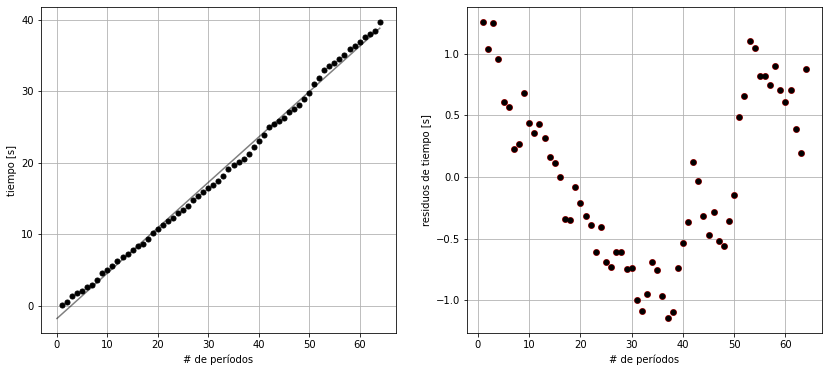

In [11]:
canal1 = ECF1data['Canal 1'].values[6000:8000]
datosTiempo1 = ECF1data['Tiempo'].values[6000:8000]
datosTiempo1 -= datosTiempo1[0]

mu1, std1 = norm.fit(canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu1)
print("Desviacion estandar del metodo:",std1)
#print("Desviacion estandar del promedio:",std1/math.sqrt(100))
maximos1, nPeriodos1 , tiempos1 = encontrarMaximos(canal1,datosTiempo1,mu1,0.2*std)
print("Numero de maximos:",maximos1,"de",canal1.size,"datos")

ECF1T1 , ordenada = regresionLineal(nPeriodos1,tiempos1,0.0001,ejeX="# de períodos",ejeY="tiempo [s]",ejeYResiduos="residuos de tiempo [s]")

print("------ CANAL 2 ------")

canal2 = ECF1data['Canal 2'].values[6000:8000]
datosTiempo2 = ECF1data['Tiempo'].values[6000:8000]
datosTiempo2 -= datosTiempo2[0]

mu2, std2 = norm.fit(canal2)

print("Promedio:",mu2)
print("Desviacion estandar del metodo:",std2)
#print("Desviacion estandar del promedio:",std1/math.sqrt(100))
maximos2, nPeriodos2, tiempos2 = encontrarMaximos(canal2,datosTiempo2,mu2,std2)
print("Numero de maximos:",maximos2,"de",canal2.size,"datos")

ECF1T2 , ordenada = regresionLineal(nPeriodos2,tiempos2,0.0001,ejeX="# de períodos",ejeY="tiempo [s]",ejeYResiduos="residuos de tiempo [s]")

print('')

plt.show()

In [12]:
ECF2data = pd.read_excel("datos/datosPendulosAcopladosEnContraFase.xlsx", "2")

------ CANAL 1 ------
Promedio: -0.0024111499999999995
Desviacion estandar del metodo: 0.0005793105190655527
Numero de maximos: 41 de 2000 datos
[R.L] Pendiente: 2.175321052634142 ± 3.877833801755616e-06
[R.L] Ordenada al origen: 101.84807894758839 ± 4.6453146287004155e-05


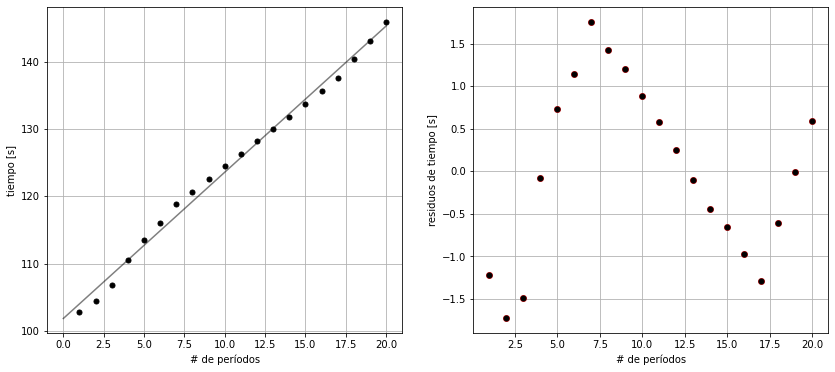

------ CANAL 2 ------
Promedio: -0.0021087000000000002
Desviacion estandar del metodo: 0.003317445951833026
Numero de maximos: 132 de 6000 datos
[R.L] Pendiente: 2.0498445673752155 ± 6.461369454345888e-07
[R.L] Ordenada al origen: 34.02441911429115 ± 2.490073511877522e-05


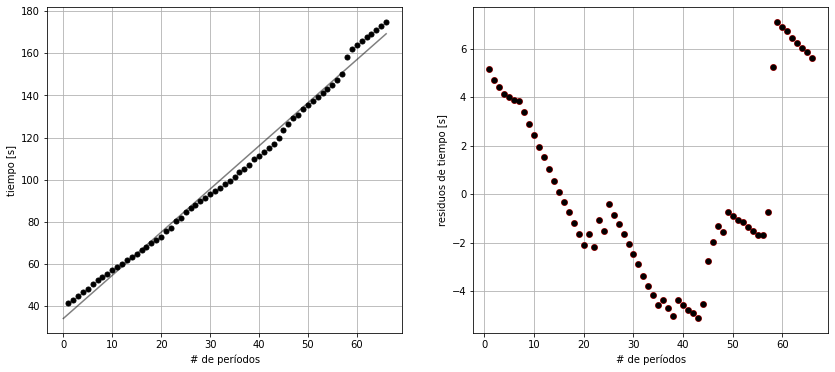

In [13]:
canal1 = ECF2data['Canal 1'].values[5000:7000]
datosTiempo1 = ECF2data['Tiempo'].values[5000:7000]

mu1, std1 = norm.fit(canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu1)
print("Desviacion estandar del metodo:",std1)
#print("Desviacion estandar del promedio:",std1/math.sqrt(100))
maximos1, nPeriodos1 , tiempos1 = encontrarMaximos(canal1,datosTiempo1,mu1,1.5*std1)
print("Numero de maximos:",maximos1,"de",canal1.size,"datos")

ECF2T1 , ordenada = regresionLineal(nPeriodos1,tiempos1,0.0001,ejeX="# de períodos",ejeY="tiempo [s]",ejeYResiduos="residuos de tiempo [s]")

print("------ CANAL 2 ------")

canal2 = ECF2data['Canal 2'].values[2000:8000]
datosTiempo2 = ECF2data['Tiempo'].values[2000:8000]

mu2, std2 = norm.fit(canal2)

print("Promedio:",mu2)
print("Desviacion estandar del metodo:",std2)
#print("Desviacion estandar del promedio:",std1/math.sqrt(100))
maximos2, nPeriodos2, tiempos2 = encontrarMaximos(canal2,datosTiempo2,mu2,2.5*std2)
print("Numero de maximos:",maximos2,"de",canal2.size,"datos")

ECF2T2 , ordenada = regresionLineal(nPeriodos2,tiempos2,0.0001,ejeX="# de períodos",ejeY="tiempo [s]",ejeYResiduos="residuos de tiempo [s]")

print('')

In [14]:
ECF3data = pd.read_excel("datos/datosPendulosAcopladosEnContraFase.xlsx", "3")

------ CANAL 1 ------
Promedio: -0.0024249999999999996
Desviacion estandar del metodo: 0.0010741578096350648
Numero de maximos: 50 de 2000 datos
[R.L] Pendiente: 1.7201669230784942 ± 2.773501578008151e-06
[R.L] Ordenada al origen: -0.9381300000042254 ± 4.123106293562138e-05


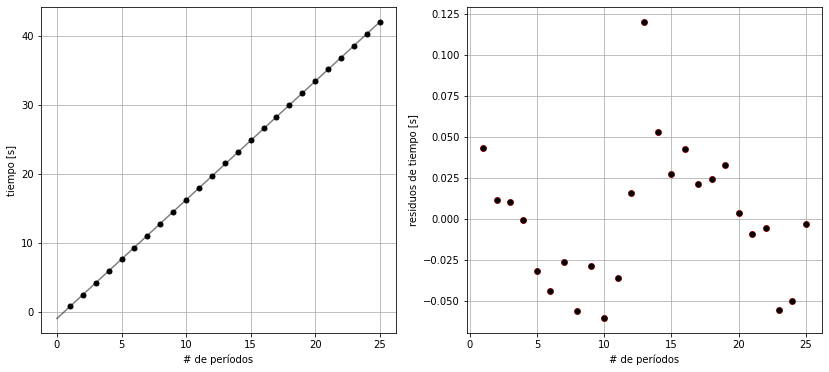

------ CANAL 2 ------
Promedio: -0.0021218
Desviacion estandar del metodo: 0.0036064712337685436
Numero de maximos: 132 de 2000 datos
[R.L] Pendiente: 0.6324182444413233 ± 6.461368883912378e-07
[R.L] Ordenada al origen: 0.614231235430396 ± 2.4900732751294038e-05


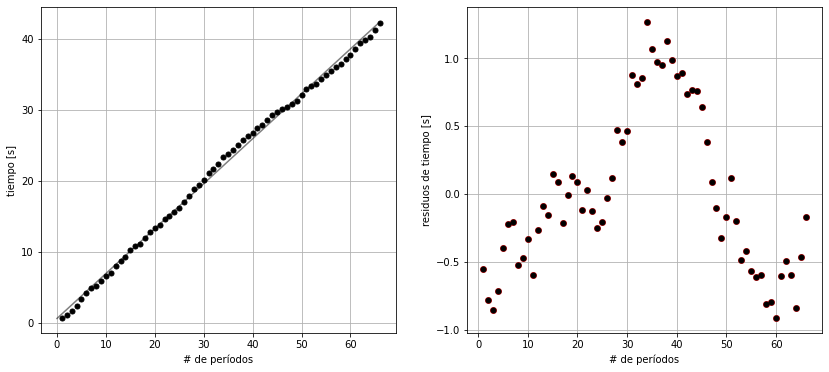

In [64]:
canal1 = ECF3data['Canal 1'].values[3000:5000]
datosTiempo1 = ECF3data['Tiempo'].values[3000:5000]
datosTiempo1 -= datosTiempo1[0]

mu1, std1 = norm.fit(canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu1)
print("Desviacion estandar del metodo:",std1)
#print("Desviacion estandar del promedio:",std1/math.sqrt(100))
maximos1, nPeriodos1 , tiempos1 = encontrarMaximos(canal1,datosTiempo1,mu1,2*std1)
print("Numero de maximos:",maximos1,"de",canal1.size,"datos")

ECF2T1 , ordenada = regresionLineal(nPeriodos1,tiempos1,0.0001,ejeX="# de períodos",ejeY="tiempo [s]",ejeYResiduos="residuos de tiempo [s]")

print("------ CANAL 2 ------")

canal2 = ECF3data['Canal 2'].values[3000:5000]
datosTiempo2 = ECF3data['Tiempo'].values[3000:5000]

mu2, std2 = norm.fit(canal2)

print("Promedio:",mu2)
print("Desviacion estandar del metodo:",std2)
#print("Desviacion estandar del promedio:",std1/math.sqrt(100))
maximos2, nPeriodos2, tiempos2 = encontrarMaximos(canal2,datosTiempo2,mu2,std2)
print("Numero de maximos:",maximos2,"de",canal2.size,"datos")

ECF2T2 , ordenada = regresionLineal(nPeriodos2,tiempos2,0.0001,ejeX="# de períodos",ejeY="tiempo [s]",ejeYResiduos="residuos de tiempo [s]")

print('')

Text(0, 0.5, 'Numero de mediciones')

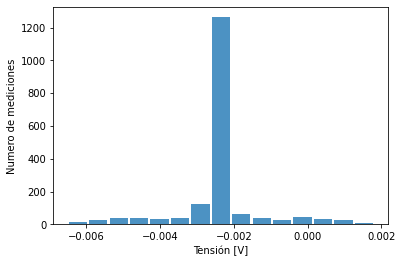

In [81]:
plt.hist(canal1, 15, density=True, rwidth=.9, alpha=.8)
plt.xlabel('Tensión [V]')
plt.ylabel("Numero de mediciones")

Text(0.5, 0, 'Tiempo [s]')

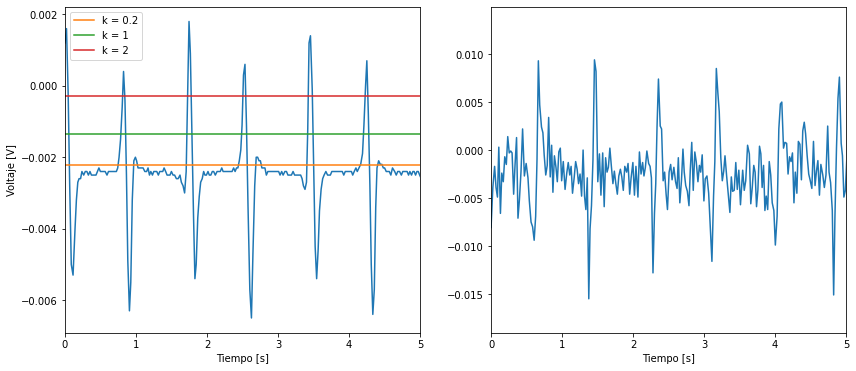

In [66]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(datosTiempo1,canal1)
ax[0].set_xlim(0,5)

ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+0.2*std1),label="k = 0.2")
ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+std1),label="k = 1")
ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+2*std1),label="k = 2")
ax[0].legend(loc = "upper left")

ax[1].plot(datosTiempo2-1.1,canal2)
ax[1].set_xlim(0,5)
ax[0].set_ylabel("Voltaje [V]")
ax[0].set_xlabel("Tiempo [s]")
ax[1].set_xlabel("Tiempo [s]")

In [17]:
MPdata1 = pd.read_excel("datos/datosPendulosAcopladosMoviendoUnoSolo.xlsx", "1")

------ CANAL 1 ------
Promedio: -0.0023998749999999997
Desviacion estandar del metodo: 0.0008391647540113918
Cantidad de batidos encontrados:  7
Periodo calculado como tiempo total/nBatidos 26.314333333333334
[R.L] Pendiente: 26.32396428576953 ± 0.01889822416918922
[R.L] Ordenada al origen: -13.369714285745651 ± 0.08451542791262931


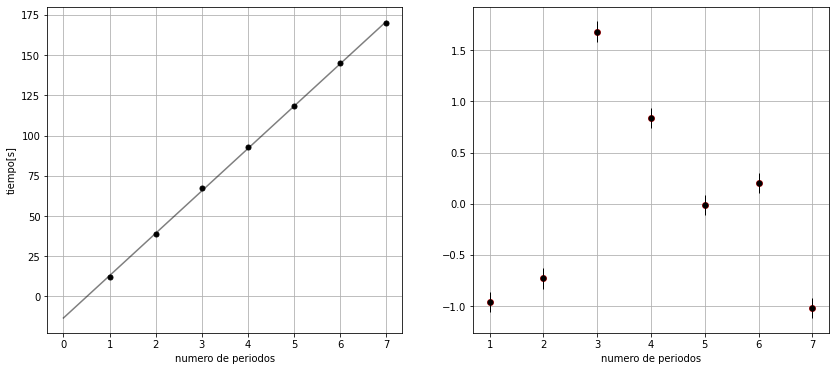

------ CANAL 2 ------
Promedio: -0.0021199667567006024
Desviacion estandar del metodo: 0.0030750161509876055
Cantidad de batidos encontrados:  9
Periodo calculado como tiempo total/nBatidos 31.250625000000003
[R.L] Pendiente: 31.179200000065837 ± 0.01290994434410723
[R.L] Ordenada al origen: 213.0501111115736 ± 0.07264831479654145


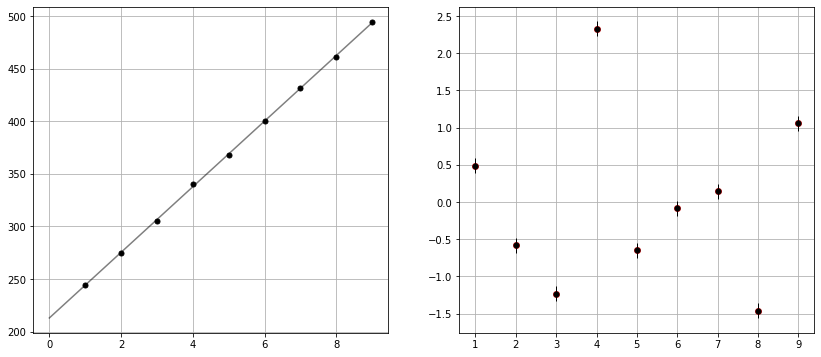

In [73]:
MP1canal1 = MPdata1['Canal 1'].values[:8000]
MP1tiempos = MPdata1['Tiempo'].values[:8000]

mu1, std1 = norm.fit(MP1canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu1)
print("Desviacion estandar del metodo:",std1)

nPeriodos , tiempos = periodoBatido(MP1canal1,MP1tiempos,mu1,2.5*std1)
print('Cantidad de batidos encontrados: ',len(tiempos))

print("Periodo calculado como tiempo total/nBatidos",(tiempos[len(tiempos)-1]-tiempos[0])/(len(nPeriodos)-1))

MP1T1 , ordenada = regresionLineal(nPeriodos,tiempos,0.1,ejeX="numero de periodos",ejeY="tiempo[s]")

print("------ CANAL 2 ------")

MP1canal2 = MPdata1['Canal 2'].values[10000:20000]
MP1tiempos = MPdata1['Tiempo'].values[10000:20000]

mu, std = norm.fit(MP1canal2)

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)

nPeriodos , tiempos = periodoBatido(MP1canal2,MP1tiempos,mu,2.5*std)
print('Cantidad de batidos encontrados: ',len(tiempos))

print("Periodo calculado como tiempo total/nBatidos",(tiempos[len(tiempos)-1]-tiempos[0])/(len(nPeriodos)-1))


MP1T2 , ordenada = regresionLineal(nPeriodos,tiempos,0.1)

In [19]:
MPdata2 = pd.read_excel("datos/datosPendulosAcopladosMoviendoUnoSolo.xlsx", "2")

------ CANAL 1 ------
Promedio: -0.00240785
Desviacion estandar del metodo: 0.0007357848717526068
Cantidad de batidos encontrados:  8
[R.L] Pendiente: 25.225011904814743 ± 1.5430337614688183e-05
[R.L] Ordenada al origen: -2.3824285714359457 ± 7.791937209120092e-05


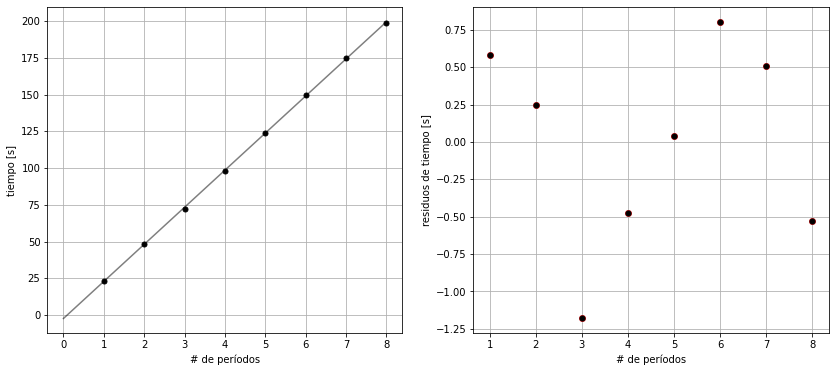

Periodo calculado como tiempo total/nBatidos 21.933
------ CANAL 2 ------
Promedio: -0.0021017600000000003
Desviacion estandar del metodo: 0.003324966300942011
Cantidad de batidos encontrados:  9
[R.L] Pendiente: 25.272549995784573 ± 0.012909945293056174
[R.L] Ordenada al origen: -15.958416638246305 ± 0.07264831796066046


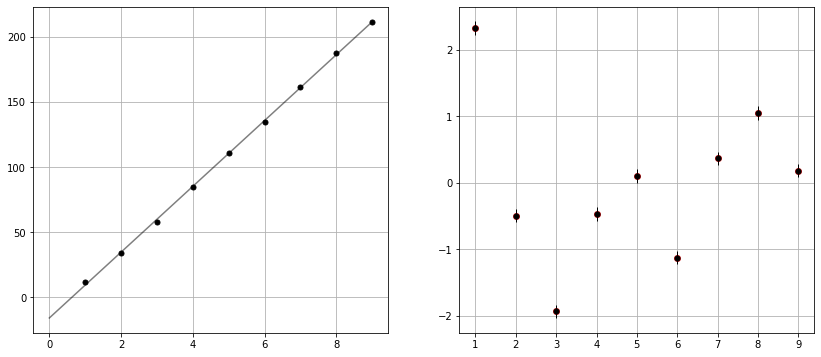

Periodo calculado como tiempo total/nBatidos 22.22588888888889


In [77]:
MP2canal1 = MPdata2['Canal 1'].values[10000:20000]
MP2tiempos = MPdata2['Tiempo'].values[10000:20000]
MP2tiempos -= MP2tiempos[0]

MP2canal1 = np.array(MP2canal1,dtype=float)
mu1, std1 = norm.fit(MP2canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu1)
print("Desviacion estandar del metodo:",std1)

nPeriodos , tiempos = periodoBatido(MP2canal1,MP2tiempos,mu1,2.5*std1)
print('Cantidad de batidos encontrados: ',len(tiempos))
MP2T1 , ordenada = regresionLineal(nPeriodos,tiempos,0.0001,ejeX="# de períodos",ejeY="tiempo [s]",ejeYResiduos="residuos de tiempo [s]")

print("Periodo calculado como tiempo total/nBatidos",(tiempos[len(tiempos)-1]-tiempos[0])/len(nPeriodos))

print("------ CANAL 2 ------")

MP2canal2 = MPdata2['Canal 2'].values[10000:20000]
MP2tiempos = MPdata2['Tiempo'].values[10000:20000]

mu, std = norm.fit(MP2canal2)

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)

nPeriodos , tiempos = periodoBatido(MP2canal2,MP2tiempos,mu,2.5*std)
print('Cantidad de batidos encontrados: ',len(tiempos))

MP2T2 , ordenada = regresionLineal(nPeriodos,tiempos,0.1)

print("Periodo calculado como tiempo total/nBatidos",(tiempos[len(tiempos)-1]-tiempos[0])/len(nPeriodos))

Text(0, 0.5, 'Numero de mediciones')

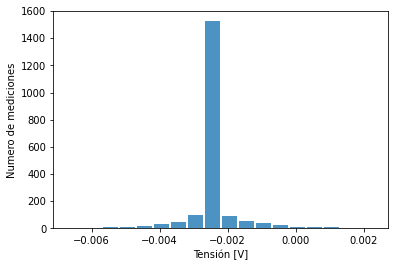

In [82]:
plt.hist(MP2canal1, 18, density=True, rwidth=.9, alpha=.8)
plt.xlabel('Tensión [V]')
plt.ylabel("Numero de mediciones")

Text(0.5, 0, 'Tiempo [s]')

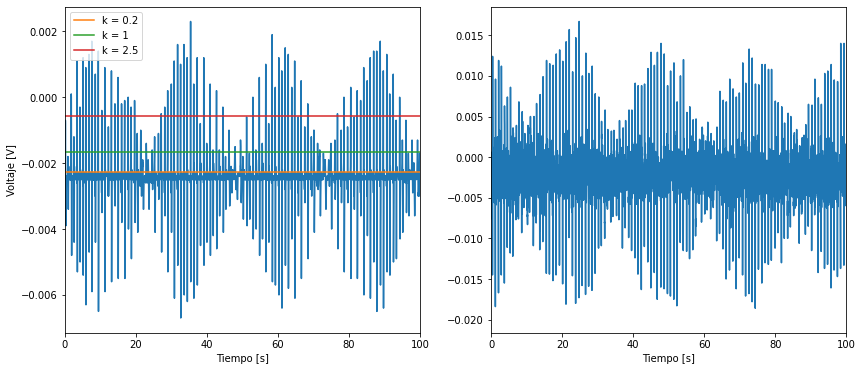

In [79]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(MP2tiempos,MP2canal1)
ax[0].set_xlim(0,100)

lineaHorizontal = np.linspace(0,100)
ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+0.2*std1),label="k = 0.2")
ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+std1),label="k = 1")
ax[0].plot(lineaHorizontal,np.ones(50)*(mu1+2.5*std1),label="k = 2.5")
ax[0].legend(loc = "upper left")

ax[1].plot(MP2tiempos,MP2canal2)
ax[1].set_xlim(0,100)
ax[0].set_ylabel("Voltaje [V]")
ax[0].set_xlabel("Tiempo [s]")
ax[1].set_xlabel("Tiempo [s]")

In [22]:
MPdata3 = pd.read_excel("datos/datosPendulosAcopladosMoviendoUnoSolo.xlsx", "3")

------ CANAL 1 ------
Promedio: -0.0024193555555555558
Desviacion estandar del metodo: 0.0008019897659517595
Cantidad de batidos encontrados:  7
[255.264 285.067 311.875 340.616 368.123 396.425 424.958]
[R.L] Pendiente: 28.144500000059203 ± 0.018898223683973304
[R.L] Ordenada al origen: 227.75457142906603 ± 0.08451542526887991


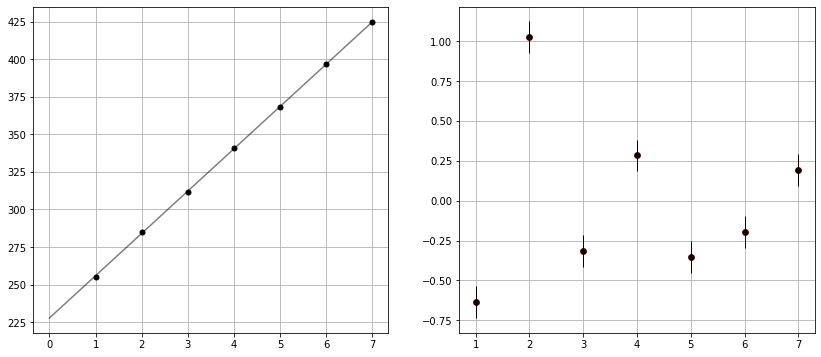

Periodo calculado como tiempo total/nBatidos 24.242
------ CANAL 2 ------
Promedio: -0.002096433333333334
Desviacion estandar del metodo: 0.0035171133288220582
Cantidad de batidos encontrados:  8
[R.L] Pendiente: 28.179083333392615 ± 0.015430334777779997
[R.L] Ordenada al origen: 214.4255000004656 ± 0.0779193710207515


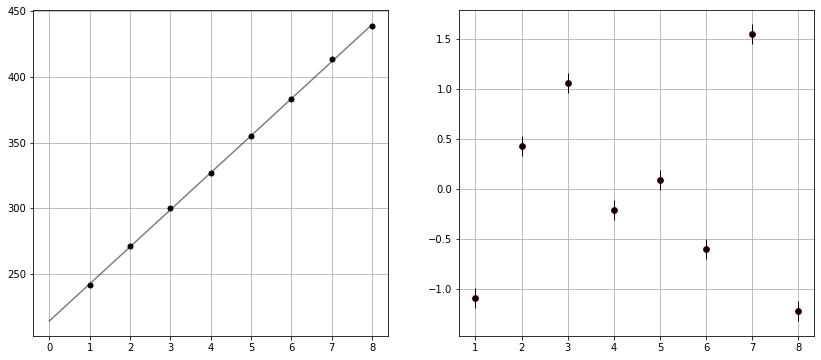

Periodo calculado como tiempo total/nBatidos 24.640249999999998


In [23]:
MP3canal1 = MPdata3['Canal 1'].values[10000:19000]
MP3tiempos = MPdata3['Tiempo'].values[10000:19000]

MP3canal1 = np.array(MP3canal1,dtype=float)
mu, std = norm.fit(MP3canal1)

print("------ CANAL 1 ------")

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)

nPeriodos , tiempos = periodoBatido(MP3canal1,MP3tiempos,mu,2.5*std)
print('Cantidad de batidos encontrados: ',len(tiempos))
print(tiempos)

MP3T1 , ordenada = regresionLineal(nPeriodos,tiempos,0.1)

print("Periodo calculado como tiempo total/nBatidos",(tiempos[len(tiempos)-1]-tiempos[0])/len(nPeriodos))

print("------ CANAL 2 ------")

MP1canal2 = MPdata3['Canal 2'].values[10000:19000]
MP3tiempos = MPdata3['Tiempo'].values[10000:19000]

mu, std = norm.fit(MP1canal2)

print("Promedio:",mu)
print("Desviacion estandar del metodo:",std)

nPeriodos , tiempos = periodoBatido(MP1canal2,MP3tiempos,mu,2.5*std)
print('Cantidad de batidos encontrados: ',len(tiempos))

MP3T2 , ordenada = regresionLineal(nPeriodos,tiempos,0.1)

print("Periodo calculado como tiempo total/nBatidos",(tiempos[len(tiempos)-1]-tiempos[0])/len(nPeriodos))

In [24]:
print("VALORES OBTENIDOS")

print("Periodo en fase")

print("MEDICION 1")
print("Canal 1:",EF1T1)
print("Canal 2:",EF1T2)

print("MEDICION 2")
print("Canal 1:",EF2T1)
print("Canal 2:",EF2T2)

print("MEDICION 3")
print("Canal 1:",EF3T1)
print("Canal 2:",EF3T2)

print("Periodo de transferencia de energia")

print("MEDICION 1")
print("Canal 1:",MP1T1)
print("Canal 2:",MP1T2)

print("MEDICION 2")
print("Canal 1:",MP2T1)
print("Canal 2:",MP2T2)

print("MEDICION 3")
print("Canal 1:",MP3T1)
print("Canal 2:",MP3T2)

print("Promedio transferencia de energia:")
print("Canal 1:",(MP1T1 + MP2T1 + MP3T1)/3)
print("Canal 2:",(MP1T2 + MP2T2 + MP3T2)/3)

VALORES OBTENIDOS
Periodo en fase
MEDICION 1
Canal 1: 1.8305680542725544
Canal 2: 2.0460627530387088
MEDICION 2
Canal 1: 2.3050735294146123
Canal 2: 1.2950820911526304
MEDICION 3
Canal 1: 1.8519565217409886
Canal 2: 1.8519081027686568
Periodo de transferencia de energia
MEDICION 1
Canal 1: 26.32396428576953
Canal 2: 31.179200000065837
MEDICION 2
Canal 1: 25.225011904814743
Canal 2: 25.272549995784573
MEDICION 3
Canal 1: 28.144500000059203
Canal 2: 28.179083333392615
Promedio transferencia de energia:
Canal 1: 26.564492063547828
Canal 2: 28.21027777641434
